# Business problem
Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in San Diego, California for 2019. 

## Problem Statement:.  
Since 2008, guests and hosts have used AirBNB to expand on travelling possibilities
and present more unique, personalized way of experiencing the world. This dataset
describes the listing activity and metrics in San Diego, California for 2019.

## Objectives: Research Questions
1. Regarding the Host  
A. Who are top earners   
B. Is there any relationship between monthly earning and prices  
2. Regarding the Neighbourhood  
A. Any particular location getting maximum number of bookings  
B. Price relation with respect to location    
3. Regarding the reviews   
A. Relationship between Quality and Price  
4. Regarding Price  
A. Price vs amenitites  
B. Price vs location

In [43]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.linear_model import LinearRegression

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

# Data Extraction

In [2]:
# Load the data from csv file
df = pd.read_csv('E:/PW/Travel Data Analysis/dataset/airbnb prices.csv')

In [3]:
# Display the number of rows and columns in dataframe
df.shape

(18723, 20)

In [4]:
# Display random 5 rows from dataset
df.sample(5)

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,minstay,name,last_modified,latitude,longitude,location
14154,3614781,1476,18213849,Entire home/apt,NaN,Amsterdam,NaN,Oostelijk Havengebied / Indische Buurt,7,4.5,2,1.0,NaN,102.0,NaN,Nice modern apartment in Amsterdam,2017-07-22 17:26:08.868793,52.365493,4.937725,0101000020E610000000917EFB3AC013405EF58079C82E...
11451,1344880,1476,7295969,Entire home/apt,NaN,Amsterdam,NaN,De Baarsjes / Oud West,10,5.0,2,1.0,NaN,114.0,NaN,Great appartment near Vondelpark,2017-07-22 18:15:25.445778,52.361006,4.860310,0101000020E6100000E2AFC91AF570134074D4D171352E...
3342,19941156,1476,141312955,Entire home/apt,NaN,Amsterdam,NaN,Oud Oost,0,0.0,4,4.0,NaN,210.0,NaN,Light and spacious family home with large garden,2017-07-23 03:00:47.883675,52.358694,4.932301,0101000020E6100000C51C041DADBA1340BEA25BAFE92D...
11798,1601017,1476,4503744,Entire home/apt,NaN,Amsterdam,NaN,De Pijp / Rivierenbuurt,53,5.0,2,1.0,NaN,118.0,NaN,"Modern, comfortabel & cozy 2p. app.",2017-07-22 17:56:28.151797,52.348222,4.910621,0101000020E61000000934D8D479A41340B5DFDA89922C...
14537,14552809,1476,4632160,Entire home/apt,NaN,Amsterdam,NaN,Bos en Lommer,7,5.0,2,1.0,NaN,97.0,NaN,Sunny 2-room apartment with balcony,2017-07-22 17:26:55.145490,52.376499,4.849914,0101000020E610000072A609DB4F66134005FD851E3130...


# Data Transformation

In [5]:
# Display a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18723 entries, 0 to 18722
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18723 non-null  int64  
 1   survey_id             18723 non-null  int64  
 2   host_id               18723 non-null  int64  
 3   room_type             18723 non-null  object 
 4   country               0 non-null      float64
 5   city                  18723 non-null  object 
 6   borough               0 non-null      float64
 7   neighborhood          18723 non-null  object 
 8   reviews               18723 non-null  int64  
 9   overall_satisfaction  18723 non-null  float64
 10  accommodates          18723 non-null  int64  
 11  bedrooms              18723 non-null  float64
 12  bathrooms             0 non-null      float64
 13  price                 18723 non-null  float64
 14  minstay               0 non-null      float64
 15  name               

In [6]:
# Check for missing values
df.isnull().sum()

room_id                     0
survey_id                   0
host_id                     0
room_type                   0
country                 18723
city                        0
borough                 18723
neighborhood                0
reviews                     0
overall_satisfaction        0
accommodates                0
bedrooms                    0
bathrooms               18723
price                       0
minstay                 18723
name                       52
last_modified               0
latitude                    0
longitude                   0
location                    0
dtype: int64

In [7]:
# Drop columns with most missing values (country, borough, bathrooms and minstay)
df.drop(['country', 'borough', 'bathrooms', 'minstay'], axis=1, inplace= True)

In [8]:
df.dropna(axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

In [9]:
df.isnull().sum()

room_id                 0
survey_id               0
host_id                 0
room_type               0
city                    0
neighborhood            0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
price                   0
name                    0
last_modified           0
latitude                0
longitude               0
location                0
dtype: int64

In [10]:
df.shape

(18671, 16)

In [11]:
# check number of duplicated rows
df.duplicated().sum()

np.int64(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18671 entries, 0 to 18670
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18671 non-null  int64  
 1   survey_id             18671 non-null  int64  
 2   host_id               18671 non-null  int64  
 3   room_type             18671 non-null  object 
 4   city                  18671 non-null  object 
 5   neighborhood          18671 non-null  object 
 6   reviews               18671 non-null  int64  
 7   overall_satisfaction  18671 non-null  float64
 8   accommodates          18671 non-null  int64  
 9   bedrooms              18671 non-null  float64
 10  price                 18671 non-null  float64
 11  name                  18671 non-null  object 
 12  last_modified         18671 non-null  object 
 13  latitude              18671 non-null  float64
 14  longitude             18671 non-null  float64
 15  location           

In [13]:
df.columns

Index(['room_id', 'survey_id', 'host_id', 'room_type', 'city', 'neighborhood',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'price',
       'name', 'last_modified', 'latitude', 'longitude', 'location'],
      dtype='object')

In [14]:
df["room_type"].value_counts()

room_type
Entire home/apt    14937
Private room        3671
Shared room           63
Name: count, dtype: int64

In [15]:
df["city"].value_counts()

city
Amsterdam    18671
Name: count, dtype: int64

In [16]:
df["neighborhood"].value_counts()

neighborhood
De Baarsjes / Oud West                    3276
De Pijp / Rivierenbuurt                   2371
Centrum West                              2216
Centrum Oost                              1727
Westerpark                                1428
Noord-West / Noord-Midden                 1415
Oud Oost                                  1166
Bos en Lommer                              983
Oostelijk Havengebied / Indische Buurt     920
Watergraafsmeer                            514
Oud Noord                                  494
Ijburg / Eiland Zeeburg                    377
Slotervaart                                348
Buitenveldert / Zuidas                     250
Noord West                                 240
Noord Oost                                 221
Geuzenveld / Slotermeer                    195
Osdorp                                     163
De Aker / Nieuw Sloten                     114
Bijlmer Centrum                             99
Bijlmer Oost                                97


In [17]:
df["name"].value_counts()

name
Amsterdam                                    36
Lovely apartment near Vondelpark             10
Spacious family house with garden             8
Beautiful apartment in Amsterdam              8
Cosy apartment in Amsterdam                   8
                                             ..
Simple sleeping place de Pijp                 1
Comfortable double bedroom                    1
Amsterdam-South Cheerful Shared Apartment     1
Sleep ship Verandering                        1
Room in the center of Amsterdam               1
Name: count, Length: 18150, dtype: int64

In [18]:
df["location"].value_counts()

location
0101000020E6100000CD565EF23F9913405F7AFB73D1304A40    1
0101000020E610000033FAD170CA8C13403BC5AA41982D4A40    1
0101000020E6100000842A357BA095134042791F4773304A40    1
0101000020E6100000A51133FB3CC613403543AA285E2B4A40    1
0101000020E6100000DF180280638F134085EE92382B304A40    1
                                                     ..
0101000020E6100000B952CF82506E13404983DBDAC2294A40    1
0101000020E610000084B9DDCB7D72134052499D80262A4A40    1
0101000020E6100000459E245D33991340A439B2F2CB2C4A40    1
0101000020E6100000A915A6EF353413408527F4FA93304A40    1
0101000020E61000006C76A4FACEBF1340583849F3C72E4A40    1
Name: count, Length: 18671, dtype: int64

In [19]:
# convert last modified column from object to datetime
df['last_modified'] = pd.to_datetime(df['last_modified'])

# Extract Date, Month and Year
df['last_modified_Day'] = df['last_modified'].dt.day
df['last_modified_Month'] = df['last_modified'].dt.month
df['last_modified_Year'] = df['last_modified'].dt.year

# Drop last modified column
df = df.drop('last_modified', axis=1)



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18671 entries, 0 to 18670
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_id               18671 non-null  int64  
 1   survey_id             18671 non-null  int64  
 2   host_id               18671 non-null  int64  
 3   room_type             18671 non-null  object 
 4   city                  18671 non-null  object 
 5   neighborhood          18671 non-null  object 
 6   reviews               18671 non-null  int64  
 7   overall_satisfaction  18671 non-null  float64
 8   accommodates          18671 non-null  int64  
 9   bedrooms              18671 non-null  float64
 10  price                 18671 non-null  float64
 11  name                  18671 non-null  object 
 12  latitude              18671 non-null  float64
 13  longitude             18671 non-null  float64
 14  location              18671 non-null  object 
 15  last_modified_Day  

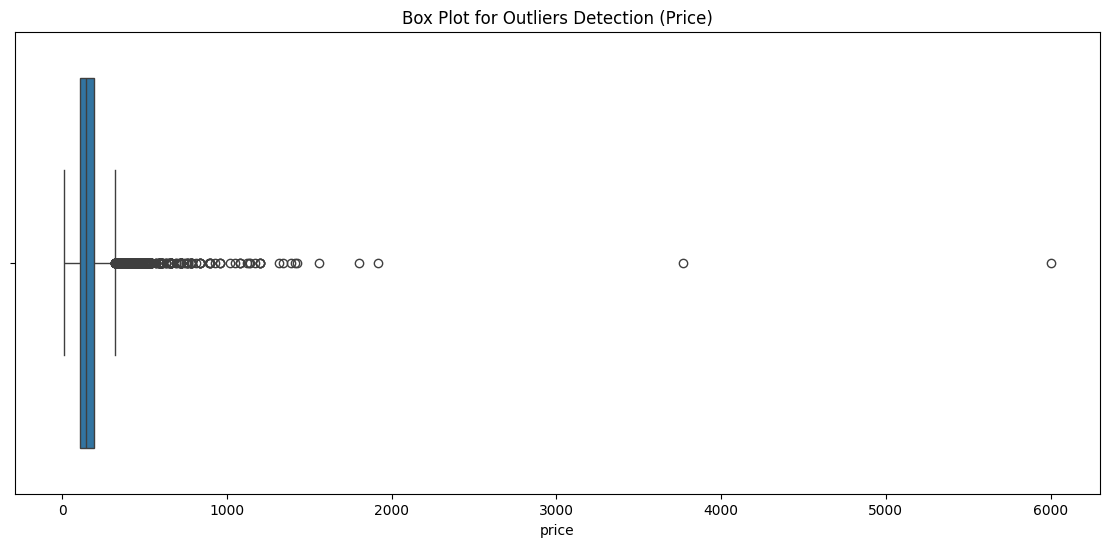

In [21]:
# Box Plot for Outliers Detection (Price)
plt.figure(figsize=(14,6))
sns.boxplot(x= df['price'])
plt.title("Box Plot for Outliers Detection (Price)")
plt.show()

The majority of the data is clustered within the range defined by the box and whiskers. Science the dataset pertains to Airbnb listings, the outliers may represent luxury or special listings that are priced significantly higher than the average.

In [22]:
# Calculate total earnings
df["Total_earnings"] = df['price'] * df['reviews']

In [23]:
# create monthly earning column
df['monthly_earnings'] = df['price'] * df['reviews'] / 12

In [24]:
# store cleaned dataset to new csv file
df.to_csv('E:\PW\Travel Data Analysis\dataset\cleaned_data.csv',index=False)

# Load Data

In [2]:
df = pd.read_csv("E:/PW/Travel Data Analysis/dataset/cleaned_data.csv")
df.head()

,room_id,survey_id,host_id,room_type,city,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,latitude,longitude,location,last_modified_Day,last_modified_Month,last_modified_Year,Total_earnings,monthly_earnings
0,10176931,1476,49180562,Shared room,Amsterdam,De Pijp / Rivierenbuurt,7,4.5,2,1.0,156.0,Red Light/ Canal view apartment (Shared),52.356209,4.887491,0101000020E610000033FAD170CA8C13403BC5AA41982D...,23,7,2017,1092.0,91.000000
1,8935871,1476,46718394,Shared room,Amsterdam,Centrum West,45,4.5,4,1.0,126.0,Sunny and Cozy Living room in quite neighbours,52.378518,4.896120,0101000020E6100000842A357BA095134042791F477330...,23,7,2017,5670.0,472.500000
2,14011697,1476,10346595,Shared room,Amsterdam,Watergraafsmeer,1,0.0,3,1.0,132.0,Amsterdam,52.338811,4.943592,0101000020E6100000A51133FB3CC613403543AA285E2B...,23,7,2017,132.0,11.000000
3,6137978,1476,8685430,Shared room,Amsterdam,Centrum West,7,5.0,4,1.0,121.0,Canal boat RIDE in Amsterdam,52.376319,4.890028,0101000020E6100000DF180280638F134085EE92382B30...,23,7,2017,847.0,70.583333
4,18630616,1476,70191803,Shared room,Amsterdam,De Baarsjes / Oud West,1,0.0,2,1.0,93.0,One room for rent in a three room appartment,52.370384,4.852873,0101000020E6100000CD902A8A57691340187B2FBE682F...,23,7,2017,93.0,7.750000


# Research Questions

## 1. Regarding the Host  
A. Who are top earners ?   

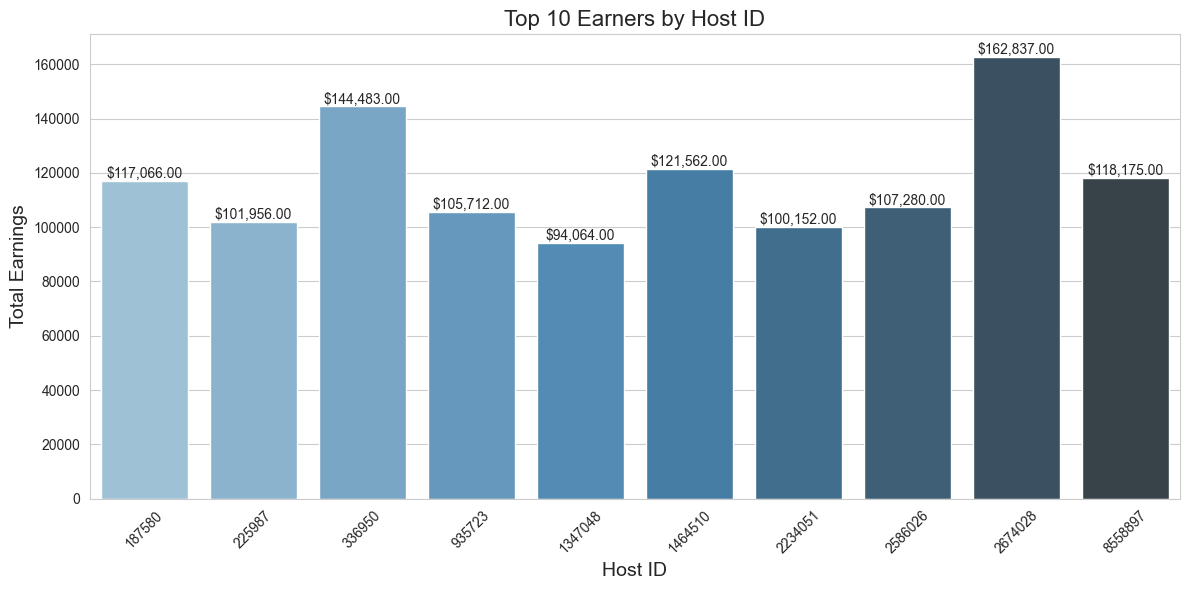

Top 10 earners by host id


,host_id,Total_earnings
0,2674028,162837.0
1,336950,144483.0
2,1464510,121562.0
3,8558897,118175.0
4,187580,117066.0
5,2586026,107280.0
6,935723,105712.0
7,225987,101956.0
8,2234051,100152.0
9,1347048,94064.0


In [3]:
# calculating top earners by host id
top_earners_id = df.groupby("host_id")["Total_earnings"].sum().sort_values(ascending=False).reset_index().head(10)

# Plotting bar chart
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
bars = sns.barplot(x = 'host_id', y = 'Total_earnings', data=top_earners_id, palette="Blues_d")

# Add labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.2f}", ha="center", va="bottom")

plt.title("Top 10 Earners by Host ID", fontsize=16)
plt.xlabel("Host ID", fontsize=14)
plt.ylabel("Total Earnings", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# print top 10 earners by Host Id 
print("Top 10 earners by host id")
top_earners_id

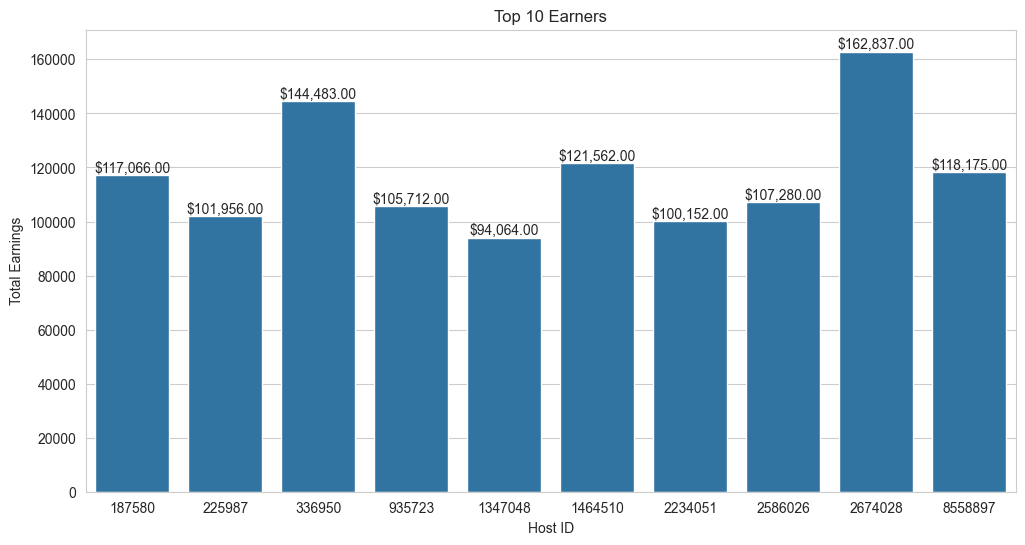

Top 10 earners by host id


,host_id,Total_earnings
0,2674028,162837.0
1,336950,144483.0
2,1464510,121562.0
3,8558897,118175.0
4,187580,117066.0
5,2586026,107280.0
6,935723,105712.0
7,225987,101956.0
8,2234051,100152.0
9,1347048,94064.0


In [4]:
# calculating top earners by host id
top_earners_id = df.groupby("host_id")["Total_earnings"].sum().sort_values(ascending=False).reset_index().head(10)

# Plotting bar chart
plt.figure(figsize=(12,6))
bars = sns.barplot(x = 'host_id', y = 'Total_earnings', data=top_earners_id)

# Add labels to the bars
for bar in bars.patches:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, height, f"${height:,.2f}", ha="center", va="bottom")

plt.title("Top 10 Earners")
plt.xlabel("Host ID")
plt.ylabel("Total Earnings")
plt.show()

# print top 10 earners by Host Id 
print("Top 10 earners by host id")
top_earners_id

Host ID 2674028, 336950 and 1464510 are the top 3 highest earners. This indicates that this hosts either has multiple listings or high-priced listings that are frequently booked. This hosts might offer premium services or have listings in highly sought-after locations.

## B. Is there any relationship between monthly earning and prices? 

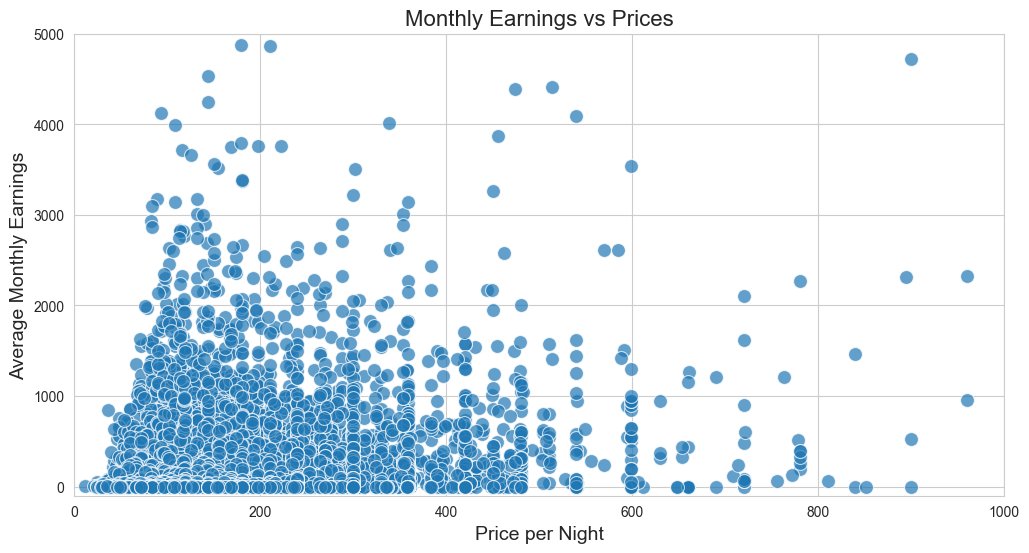


Correlation between Monthly Earning and Price: 0.15, P-value: 0.00


In [46]:
# Calculate average monthly earnings and price by host ID
monthly_earnings = df.groupby("host_id")["monthly_earnings"].mean().reset_index()
average_price = df.groupby('host_id')['price'].mean().reset_index()

# Merge dataframes
earnings_price_df = pd.merge(monthly_earnings, average_price, on='host_id')

# Plotting Scatter Plot
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.scatterplot(x='price', y='monthly_earnings', data=earnings_price_df, alpha=0.7, s=100)
plt.xlim(0,1000)
plt.ylim(-100,5000)
plt.title('Monthly Earnings vs Prices', fontsize=16)
plt.xlabel('Price per Night', fontsize=14)
plt.ylabel('Average Monthly Earnings', fontsize=14)
plt.show()

# Calculate correlation and p-value
correlation, p_value = stats.pearsonr(earnings_price_df['monthly_earnings'], earnings_price_df['price'])
print(f"\nCorrelation between Monthly Earning and Price: {correlation:.2f}, P-value: {p_value:.2f}")

The correlation coefficient value of 0.153 indicates a weak positive correlation between monthly earnings and prices. This means that as prices increase, monthly earnings tend to increase as well, but the relationship is not very strong.

The p-value of 2.197e-84 is much smaller than any typical significance level 0.05, indicating that the correlation is statistically significant. This means that we can reject the null hypothesis that there is no relationship between monthly earnings and prices.

This result suggests that while there is a statistically significant relationship between prices and monthly earnings, the strength of the relationship is weak.

## 2. Regarding the Neighbourhood:
A. Any particular location getting maximum number of bookings?  

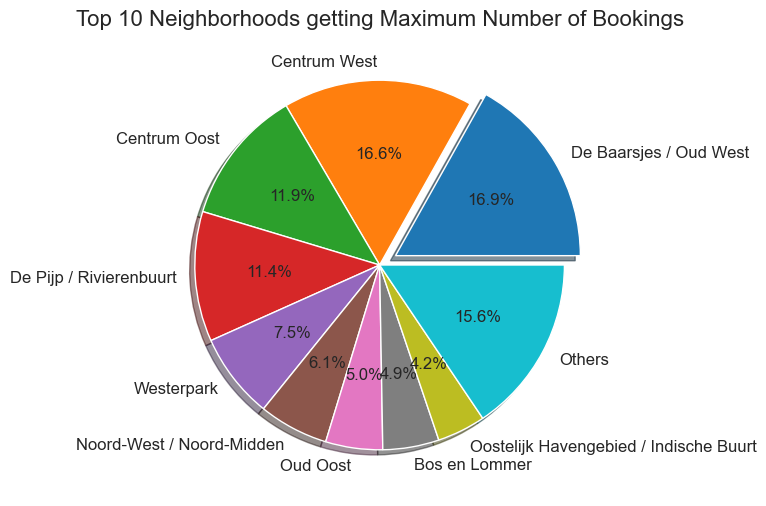

Neighborhoods getting maximum number of bookings


,neighborhood,reviews
7,De Baarsjes / Oud West,52769
5,Centrum West,51892
4,Centrum Oost,37170
8,De Pijp / Rivierenbuurt,35577
21,Westerpark,23423
14,Noord-West / Noord-Midden,19082
18,Oud Oost,15603
2,Bos en Lommer,15387
15,Oostelijk Havengebied / Indische Buurt,13252
10,Others,48719


In [47]:
# Calculate total numbers of Bookings by neighborhood
neighborhood_bookings = df.groupby('neighborhood')['reviews'].sum().reset_index().sort_values(by='reviews', ascending=False)

# Calculate the sum of bookings for all neighborhoods beyond the top 9
others = neighborhood_bookings['reviews'][9:].sum()

# Create a new dataframe with the top 10 neighborhoods and the "others" category
top_10_neighborhood_bookings = neighborhood_bookings.head(9)
top_10_neighborhood_bookings.loc[10] = ['Others', others]

# Plotting Pie chart for locations with the maximum number of bookings
plt.figure(figsize=(12,6))
explode = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)  # Shadow
plt.pie(top_10_neighborhood_bookings['reviews'], labels=top_10_neighborhood_bookings['neighborhood'], autopct='%1.1f%%', explode=explode, shadow=True, textprops={'fontsize': 12})
plt.title("Top 10 Neighborhoods getting Maximum Number of Bookings", fontsize=16)
plt.show()

# Display Neighborhoods getting maximum number of bookings
print("Neighborhoods getting maximum number of bookings")
top_10_neighborhood_bookings

The "De Baarsjes / Oud West" neighborhood is receiving the highest number of bookings, accounting for 16.9% of overall bookings, followed by the "Centrum West" neighborhood, which accounts for 16.6% of overall bookings. These areas likely offer attractive amenities, proximity to popular attractions, or a high concentration of listings, making them popular choices for guests.

## B. Price relation with respect to location    

In [29]:
# Calculating Top 10 average price by neighborhood
top_10_neighborhood_by_avg_price = df.groupby("neighborhood")["price"].mean().sort_values(ascending = False).head(10).reset_index()

# Print Top 10 Neighborhood by Average price
print("Top 10 Neighborhood by Average price")
top_10_neighborhood_by_avg_price

Top 10 Neighborhood by Average price


,neighborhood,price
0,Centrum West,208.561372
1,Centrum Oost,201.202664
2,Noord-West / Noord-Midden,182.698940
3,Ijburg / Eiland Zeeburg,175.867374
4,De Pijp / Rivierenbuurt,168.320540
5,Westerpark,163.801821
6,De Baarsjes / Oud West,158.996032
7,Oud Noord,156.979757
8,Watergraafsmeer,154.447471
9,Oud Oost,151.731561


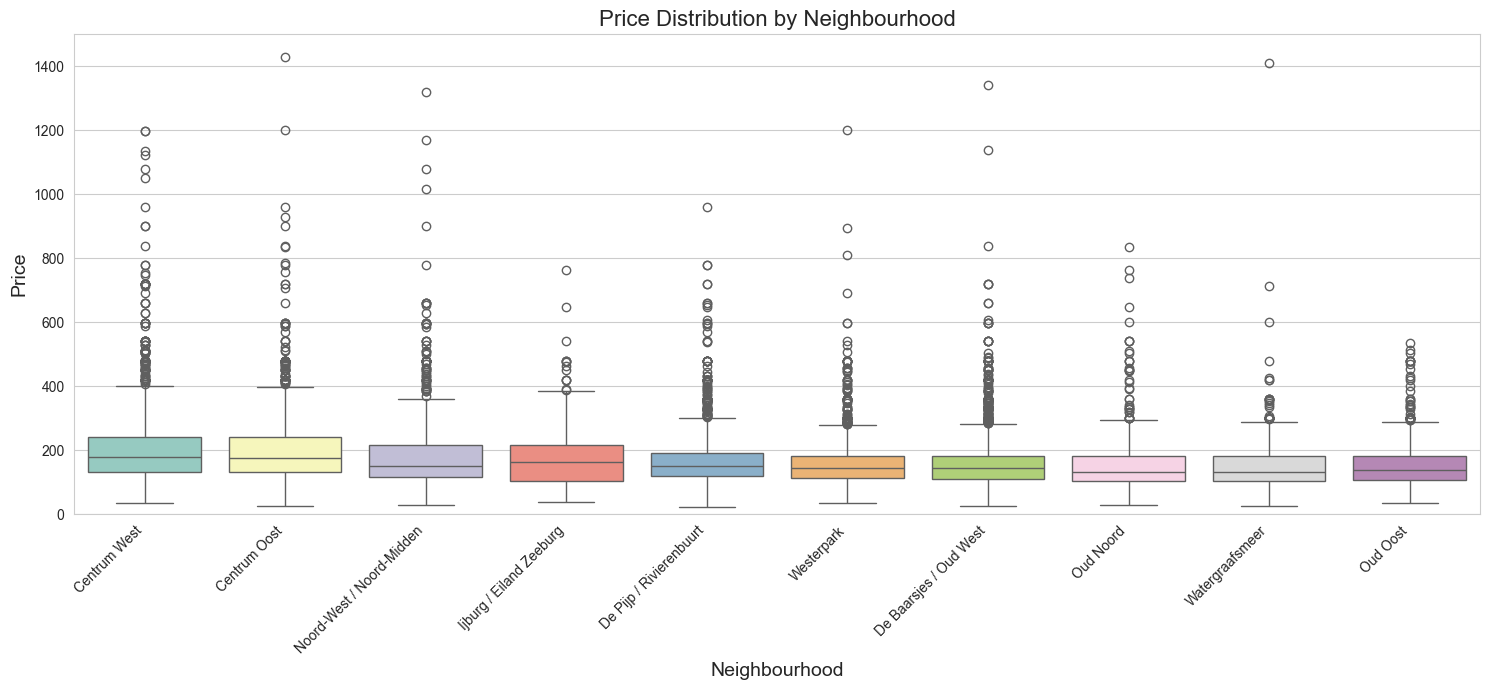

In [9]:
# Box plot for price distribution by top 10 neighbourhood
top_10_neighborhood = ['Centrum West', 'Centrum Oost', 'Noord-West / Noord-Midden', 'Ijburg / Eiland Zeeburg', 'De Pijp / Rivierenbuurt', 'Westerpark', 'De Baarsjes / Oud West', 'Oud Noord', 'Watergraafsmeer', 'Oud Oost']
data = df[df['neighborhood'].isin(top_10_neighborhood)]

plt.figure(figsize=(15, 7))
sns.boxplot(x='neighborhood', y='price', data=data, order=top_10_neighborhood, palette='Set3')
plt.title('Price Distribution by Neighbourhood', fontsize=16)
plt.xlabel('Neighbourhood', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0,1500)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [31]:
# T-test 
# null hypothesis: Average price in 'De Baarsjes / Oud West' neighborhoods == Average price in 'De Pijp / Rivierenbuurt' neighborhood.
location1 = df[df['neighborhood'] == 'De Baarsjes / Oud West']['price']
location2 = df[df['neighborhood'] == 'De Pijp / Rivierenbuurt']['price']
t_stat, p_value = stats.ttest_ind(location1, location2)
print(f"\nPrice Comparison between De Baarsjes / Oud West and De Pijp / Rivierenbuurt: T-statistic: {t_stat}, P-value: {p_value}")


Price Comparison between De Baarsjes / Oud West and De Pijp / Rivierenbuurt: T-statistic: -4.207718337112765, P-value: 2.619625729162586e-05


T-statistic: -4.208: This value indicates the magnitude and direction of the difference in means between the two groups. A negative value suggests that the average price in "De Baarsjes / Oud West" is lower than in "De Pijp / Rivierenbuurt".

P-value: 2.62e-05: This very small p-value indicates that the difference in prices between the two neighborhoods is statistically significant. We can reject the null hypothesis that there is no difference in prices between these neighborhoods.

## 3. Regarding the reviews   
A. Relationship between Quality and Price 

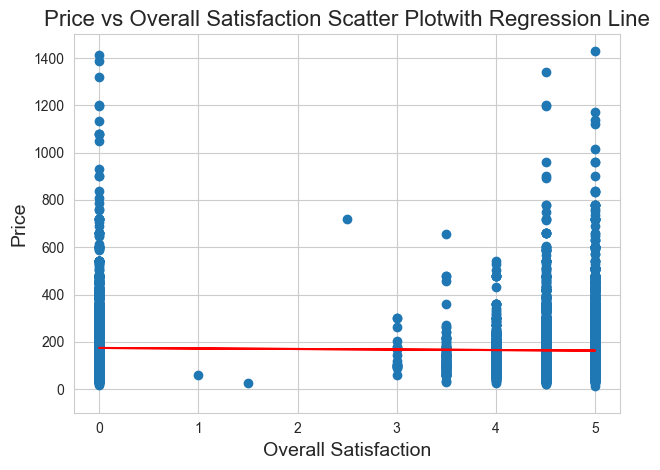

Correlation between Overall Satisfaction Scores and Price: -0.0451, P-value: 0.0000
Weak negative correlation between Overall Satisfaction Scores and Price


In [45]:
# Create a scatter plot
plt.scatter(df['overall_satisfaction'], df['price'])

# Create a linear regression model
X = df[['overall_satisfaction']]
y = df['price']
model = LinearRegression()
model.fit(X, y)

# Plot the regression line
plt.plot(X, model.predict(X), color='red')

plt.ylim(-100,1500)
plt.title('Price vs Overall Satisfaction Scatter Plotwith Regression Line', fontsize=16)
plt.xlabel('Overall Satisfaction', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.tight_layout()
plt.show()

# Correlation test between Overall Satisfaction Scores and Price
correlation, p_value = stats.pearsonr(df['overall_satisfaction'], df['price'])
print(f"Correlation between Overall Satisfaction Scores and Price: {correlation:.4f}, P-value: {p_value:.4f}")

# Interpretation of the correlation coefficient
if correlation > 0.7:
    print("Strong positive correlation between Overall Satisfaction Scores and Price\033[0m")
elif correlation > 0.3:
    print("Moderate positive correlation between Overall Satisfaction Scores and Price\033[0m")
elif correlation > 0:
    print("Weak positive correlation between Overall Satisfaction Scores and Price\033[0m")
elif correlation == 0:
    print("No correlation between Overall Satisfaction Scores and Price\033[0m")
elif correlation < -0.7:
    print("Strong negative correlation between Overall Satisfaction Scores and Price\033[0m")
elif correlation < -0.3:
    print("Moderate negative correlation between Overall Satisfaction Scores and Price\033[0m")
else:
    print("Weak negative correlation between Overall Satisfaction Scores and Price\033[0m")

Correlation Coefficient (-0.045): This indicates a very weak negative correlation between overall satisfaction scores and price. This means that as prices increase, satisfaction scores tend to decrease slightly, but the relationship is very weak.

P-value (7.32e-10): This very small p-value indicates that the correlation is statistically significant.

## 4. Regarding Price:  
A. Price vs amenitites.  

room_type
Entire home/apt    181.588070
Private room       106.886679
Shared room        103.682540
Name: price, dtype: float64


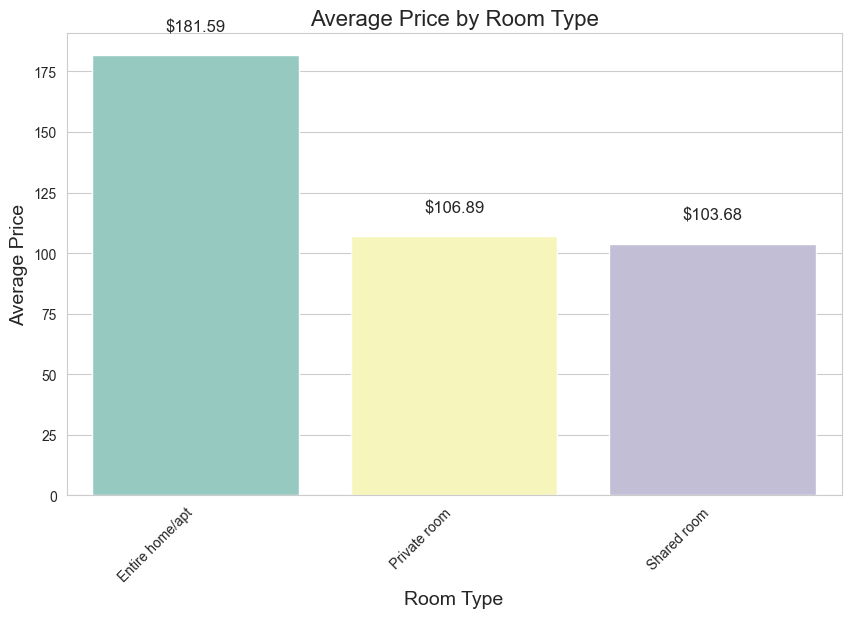

In [33]:
# Price vs room_type
room_type_prices = df.groupby('room_type')['price'].mean().sort_values(ascending=False)
print(room_type_prices)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_prices.index, y=room_type_prices.values, palette='Set3')
plt.title('Average Price by Room Type', fontsize=16)
plt.xlabel('Room Type', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add price labels above each bar
for i, value in enumerate(room_type_prices.values):
    plt.text(i, value + 10, f"${value:.2f}", ha='center', fontsize=12)

plt.show()

In [34]:
# Price vs Room Type
# Get unique room types
room_types = df['room_type'].unique()

# Perform pairwise t-tests
for i in range(len(room_types)):
    for j in range(i + 1, len(room_types)):
        group1 = df[df['room_type'] == room_types[i]]['price']
        group2 = df[df['room_type'] == room_types[j]]['price']
        t_stat, p_value = stats.ttest_ind(group1, group2)
        print(f'Room Type Comparison: {room_types[i]} vs {room_types[j]}: T-statistic: {t_stat}, P-value: {p_value}')

Room Type Comparison: Shared room vs Entire home/apt: T-statistic: -5.393615432023536, P-value: 7.010065624360416e-08
Room Type Comparison: Shared room vs Private room: T-statistic: -0.5092371199652761, P-value: 0.6106161339943484
Room Type Comparison: Entire home/apt vs Private room: T-statistic: 38.67021932074596, P-value: 0.0


Price vs Room Type

Shared room vs Entire home/apt:

T-statistic: -5.3936
P-value: 7.0101e-08
This very small p-value indicates that the difference in prices between shared rooms and entire homes/apartments is statistically significant. The negative t-statistic suggests that shared rooms are generally cheaper than entire homes/apartments.

Shared room vs Private room:

T-statistic: -0.5092
P-value: 0.6106
The large p-value indicates that there is no statistically significant difference in prices between shared rooms and private rooms.

Entire home/apt vs Private room:

T-statistic: 38.6702
P-value: 0.0
The extremely small p-value indicates that the difference in prices between entire homes/apartments and private rooms is statistically significant. The positive t-statistic suggests that entire homes/apartments are generally more expensive than private rooms.

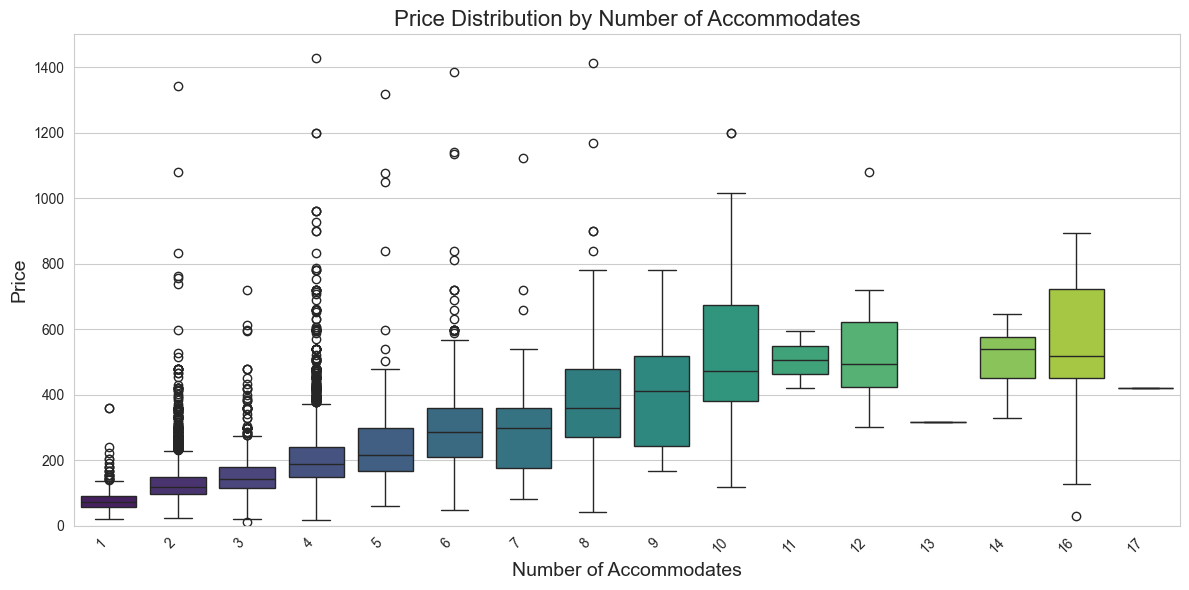

Correlation between Price and Accommodates is 0.5002
Moderate positive correlation between Price and Accommodates


In [19]:
# Price vs accommodates
plt.figure(figsize=(12, 6))
sns.boxplot(x='accommodates', y='price', data=df, palette='viridis')
plt.title('Price Distribution by Number of Accommodates', fontsize=16)
plt.xlabel('Number of Accommodates', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0,1500)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# correlation of Price vs Accommodates
correlation_price_accomodates = df['price'].corr(df['accommodates']).round(4)
print(f"Correlation between Price and Accommodates is {correlation_price_accomodates}")

# Interpretation of the correlation coefficient
if correlation_price_accomodates > 0.7:
    print("Strong positive correlation between Price and Accommodates")
elif correlation_price_accomodates > 0.3:
    print("Moderate positive correlation between Price and Accommodates")
elif correlation_price_accomodates > 0:
    print("Weak positive correlation between Price and Accommodates")
elif correlation_price_accomodates == 0:
    print("No correlation between Price and Accommodates")
elif correlation_price_accomodates < -0.7:
    print("Strong negative correlation between Price and Accommodates")
elif correlation_price_accomodates < -0.3:
    print("Moderate negative correlation between Price and Accommodates")
else:
    print("Weak negative correlation between Price and Accommodates")

Price vs accommodates

A correlation coefficient of 0.5 between price and accommodates indicates a moderate positive relationship. This means that as the number of people a property can accommodate increases, the price tends to increase as well, though it's not a perfect relationship.

The comparisons indicate that the price differences for most of the "accommodates" values are statistically significant. There are a few comparisons with no significant differences, which may indicate similar pricing for those specific groups.

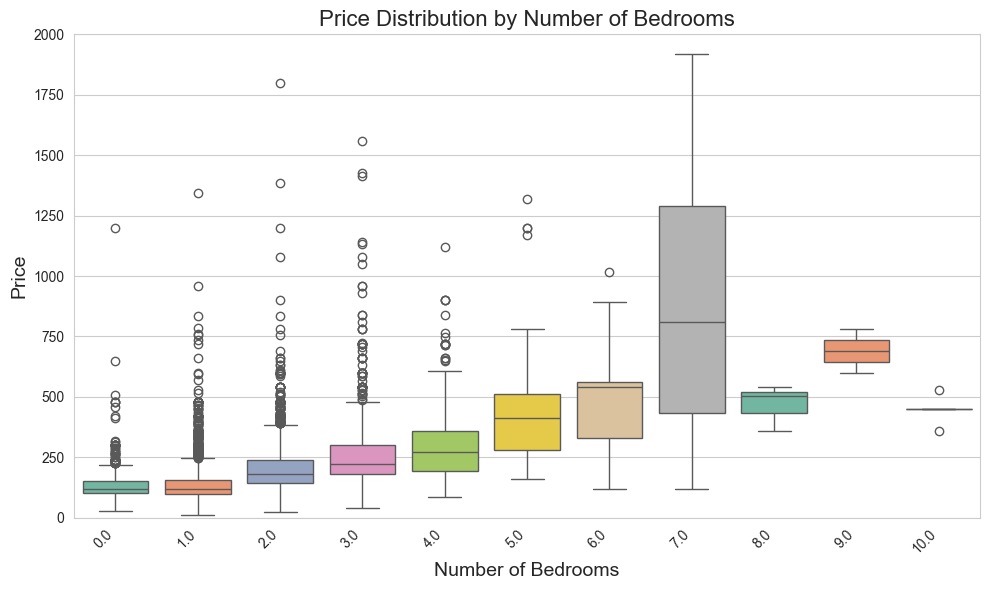

Correlation between Price and Bedrooms is 0.4459
Moderate positive correlation between Price and Bedrooms


In [28]:
# Price vs bedrooms
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df, palette='Set2')
plt.title('Price Distribution by Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.ylim(0,2000)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# correlation of Price vs Bedrooms
correlation_price_bedrooms = df['price'].corr(df['bedrooms']).round(4)
print(f"Correlation between Price and Bedrooms is {correlation_price_bedrooms}")

# Interpretation of the correlation coefficient
if correlation_price_bedrooms > 0.7:
    print("Strong positive correlation between Price and Bedrooms")
elif correlation_price_bedrooms > 0.3:
    print("Moderate positive correlation between Price and Bedrooms")
elif correlation_price_bedrooms > 0:
    print("Weak positive correlation between Price and Bedrooms")
elif correlation_price_bedrooms == 0:
    print("No correlation between Price and Bedrooms")
elif correlation_price_bedrooms < -0.7:
    print("Strong negative correlation between Price and Bedrooms")
elif correlation_price_bedrooms < -0.3:
    print("Moderate negative correlation between Price and Bedrooms")
else:
    print("Weak negative correlation between Price and Bedrooms")

Price vs bedrooms

A correlation coefficient of 0.45 between price and bedrooms suggests a moderate positive relationship. This indicates that, generally, as the number of bedrooms increases, the price also tends to increase, but the correlation isn't extremely strong.

The comparisons indicate that the price differences for most of the "No. of Bedrooms" values are statistically significant. There are a few comparisons with no significant differences, which may indicate similar pricing for those specific groups.

This suggests that properties with more amenities and space (such as room type, more accommodations and bedrooms) can command higher prices.

## B. Price vs location.

This has already been addressed in the neighborhood section, using visualizations to understand the impact of location on price.

# Summary of Results:

#### 1. Host Earnings

- **Top Earners**: The highest earners are Host IDs 2674028, 336950, and 1464510. These hosts likely have multiple listings, high-priced listings, or both, potentially offering premium services or being located in high-demand areas.
  
- **Monthly Earnings vs. Prices**: There is a weak positive correlation (0.153) between monthly earnings and prices, meaning higher prices tend to lead to higher earnings, but the relationship is not very strong. Despite this, the correlation is statistically significant (p-value of 2.197e-84), indicating a genuine relationship.

#### 2. Neighborhoods

- **Bookings**: The "De Baarsjes / Oud West" neighborhood leads in bookings with 16.9% of the total bookings, closely followed by "Centrum West" with 16.6%. These areas are likely popular due to their amenities, attractions, or high number of listings.
  
- **Price Differences by Neighborhood**: There is a statistically significant difference in average prices between "De Baarsjes / Oud West" and "De Pijp / Rivierenbuurt," with prices in "De Baarsjes / Oud West" being lower (t-statistic: -4.208, p-value: 2.62e-05).

#### 3. Reviews

- **Quality vs. Price**: There is a very weak negative correlation (-0.045) between overall satisfaction scores and price, suggesting that higher prices are associated with slightly lower satisfaction scores. This relationship is statistically significant (p-value: 7.32e-10).

#### 4. Price Analysis

- **Room Types**:
  - **Shared Room vs. Entire Home/Apt**: Shared rooms are significantly cheaper than entire homes/apartments (t-statistic: -5.3936, p-value: 7.0101e-08).
  - **Shared Room vs. Private Room**: No significant price difference between shared rooms and private rooms (t-statistic: -0.5092, p-value: 0.6106).
  - **Entire Home/Apt vs. Private Room**: Entire homes/apartments are significantly more expensive than private rooms (t-statistic: 38.6702, p-value: 0.0).

- **Price vs. Accommodates**: There is a moderate positive correlation (0.5) between price and the number of people a property can accommodate, indicating that as accommodation capacity increases, so does the price. Differences in pricing based on accommodation capacity are generally statistically significant.

- **Price vs. Bedrooms**: A moderate positive correlation (0.45) exists between price and the number of bedrooms, meaning that more bedrooms typically lead to higher prices. Most comparisons of prices based on bedroom count are statistically significant.

- **Price vs. Location**: Price variations by location have been previously covered in the neighborhood analysis.

This summary provides an overview of key insights related to host earnings, neighborhood popularity, review ratings, and pricing trends based on various factors.
   
These findings can help hosts optimize their listings and pricing strategies based on location, amenities, and guest preferences. They provide valuable insights for potential hosts on where to list their properties and how to enhance guest satisfaction.